Farheena Hassan
2/6/24


# Example Dashboard

##  Bar chart with gradients
Matplotlib does not natively support gradients. However, we can emulate a gradient-filled rectangle by an AxesImage of the right size and coloring.

In particular, we use a colormap to generate the actual colors. It is then sufficient to define the underlying values on the corners of the image and let bicubic interpolation fill out the area. We define the gradient direction by a unit vector v. The values at the corners are then obtained by the lengths of the projections of the corner vectors on v.

A similar approach can be used to create a gradient background for an Axes. In that case, it is helpful to use Axes coordinates (extent=(0, 1, 0, 1), transform=ax.transAxes) to be independent of the data coordinates.

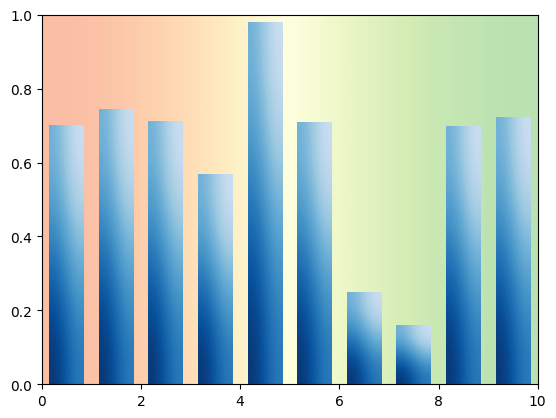

In [2]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)


def gradient_image(ax, direction=0.3, cmap_range=(0, 1), **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax : Axes
        The Axes to draw on.
    direction : float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range : float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular, *cmap*, *extent*, and *transform* may be useful.
    """
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, interpolation='bicubic', clim=(0, 1),
                   aspect='auto', **kwargs)
    return im


def gradient_bar(ax, x, y, width=0.5, bottom=0):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=plt.cm.Blues_r, cmap_range=(0, 0.8))


fig, ax = plt.subplots()
ax.set(xlim=(0, 10), ylim=(0, 1))

# background image
gradient_image(ax, direction=1, extent=(0, 1, 0, 1), transform=ax.transAxes,
               cmap=plt.cm.RdYlGn, cmap_range=(0.2, 0.8), alpha=0.5)

N = 10
x = np.arange(N) + 0.15
y = np.random.rand(N)
gradient_bar(ax, x, y, width=0.7)
plt.show()

##  Grouped bar chart with labels
This example shows a how to create a grouped bar chart and how to annotate bars with labels.

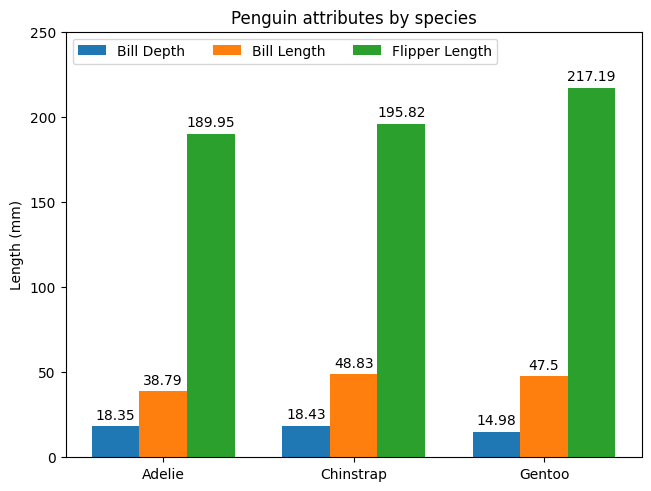

In [4]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

##  Creating a timeline with lines, dates, and text
How to create a simple timeline using Matplotlib release dates.

Timelines can be created with a collection of dates and text. In this example, we show how to create a simple timeline using the dates for recent releases of Matplotlib. First, we'll pull the data from GitHub.

In [7]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.dates as mdates

try:
    # Try to fetch a list of Matplotlib releases and their dates
    # from https://api.github.com/repos/matplotlib/matplotlib/releases
    import json
    import urllib.request

    url = 'https://api.github.com/repos/matplotlib/matplotlib/releases'
    url += '?per_page=100'
    data = json.loads(urllib.request.urlopen(url, timeout=1).read().decode())

    dates = []
    releases = []
    for item in data:
        if 'rc' not in item['tag_name'] and 'b' not in item['tag_name']:
            dates.append(item['published_at'].split("T")[0])
            releases.append(item['tag_name'].lstrip("v"))

except Exception:
    # In case the above fails, e.g. because of missing internet connection
    # use the following lists as fallback.
    releases = ['2.2.4', '3.0.3', '3.0.2', '3.0.1', '3.0.0', '2.2.3',
                '2.2.2', '2.2.1', '2.2.0', '2.1.2', '2.1.1', '2.1.0',
                '2.0.2', '2.0.1', '2.0.0', '1.5.3', '1.5.2', '1.5.1',
                '1.5.0', '1.4.3', '1.4.2', '1.4.1', '1.4.0']
    dates = ['2019-02-26', '2019-02-26', '2018-11-10', '2018-11-10',
             '2018-09-18', '2018-08-10', '2018-03-17', '2018-03-16',
             '2018-03-06', '2018-01-18', '2017-12-10', '2017-10-07',
             '2017-05-10', '2017-05-02', '2017-01-17', '2016-09-09',
             '2016-07-03', '2016-01-10', '2015-10-29', '2015-02-16',
             '2014-10-26', '2014-10-18', '2014-08-26']

dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]  # Convert strs to dates.
dates, releases = zip(*sorted(zip(dates, releases)))  # Sort by increasing date.

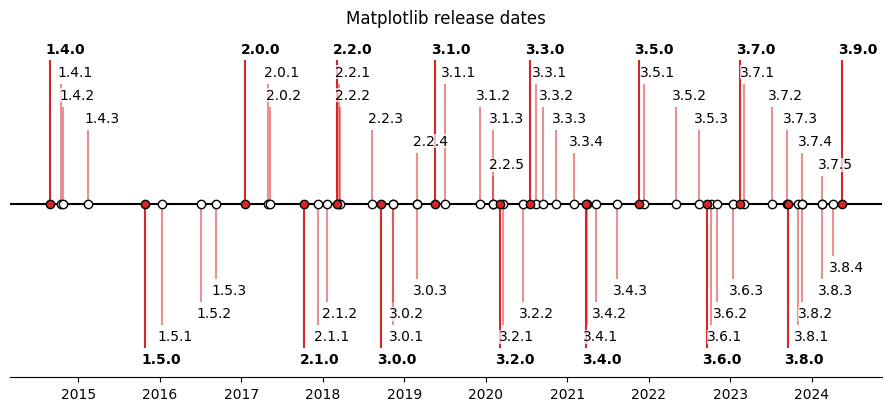

In [8]:
# Choose some nice levels: alternate minor releases between top and bottom, and
# progressievly shorten the stems for bugfix releases.
levels = []
major_minor_releases = sorted({release[:3] for release in releases})
for release in releases:
    major_minor = release[:3]
    bugfix = int(release[4])
    h = 1 + 0.8 * (5 - bugfix)
    level = h if major_minor_releases.index(major_minor) % 2 == 0 else -h
    levels.append(level)

# The figure and the axes.
fig, ax = plt.subplots(figsize=(8.8, 4), layout="constrained")
ax.set(title="Matplotlib release dates")

# The vertical stems.
ax.vlines(dates, 0, levels,
          color=[("tab:red", 1 if release.endswith(".0") else .5)
                 for release in releases])
# The baseline.
ax.axhline(0, c="black")
# The markers on the baseline.
minor_dates = [date for date, release in zip(dates, releases) if release[-1] == '0']
bugfix_dates = [date for date, release in zip(dates, releases) if release[-1] != '0']
ax.plot(bugfix_dates, np.zeros_like(bugfix_dates), "ko", mfc="white")
ax.plot(minor_dates, np.zeros_like(minor_dates), "ko", mfc="tab:red")

# Annotate the lines.
for date, level, release in zip(dates, levels, releases):
    ax.annotate(release, xy=(date, level),
                xytext=(-3, np.sign(level)*3), textcoords="offset points",
                verticalalignment="bottom" if level > 0 else "top",
                weight="bold" if release.endswith(".0") else "normal",
                bbox=dict(boxstyle='square', pad=0, lw=0, fc=(1, 1, 1, 0.7)))

ax.yaxis.set(major_locator=mdates.YearLocator(),
             major_formatter=mdates.DateFormatter("%Y"))

# Remove the y-axis and some spines.
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()